In [58]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [59]:
# Reading the datasets
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
None


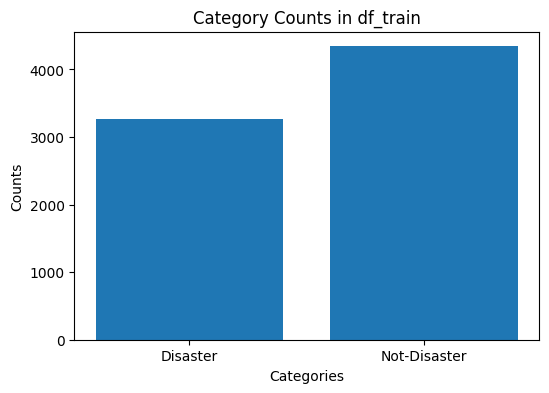

In [60]:
# Exploring the data
print(df_train.info())
print(df_test.info())

# Bar plot
labels = ['Disaster', 'Not-Disaster']
counts = [len(df_train[df_train['target'] == 1]), len(df_train[df_train['target'] == 0])]
plt.figure(figsize=(6, 4))
plt.bar(labels, counts)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Category Counts in df_train')
plt.show()

In [61]:
# Converting to DataFrame
df_train = pd.DataFrame(df_train)
df_test = pd.DataFrame(df_test)

In [62]:
# Printing out the top 5 elements of the dataset
print(df_train.head())
print(df_test.head())

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan


In [63]:
# Dropping the keyword and location column
df_train = df_train.drop(['keyword', 'location'], axis=1)
df_test = df_test.drop(['keyword', 'location'], axis=1)

In [64]:
# Printing out the new dataset
print(df_train.head())
print(df_test.head())

   id                                               text  target
0   1  Our Deeds are the Reason of this #earthquake M...       1
1   4             Forest fire near La Ronge Sask. Canada       1
2   5  All residents asked to 'shelter in place' are ...       1
3   6  13,000 people receive #wildfires evacuation or...       1
4   7  Just got sent this photo from Ruby #Alaska as ...       1
   id                                               text
0   0                 Just happened a terrible car crash
1   2  Heard about #earthquake is different cities, s...
2   3  there is a forest fire at spot pond, geese are...
3   9           Apocalypse lighting. #Spokane #wildfires
4  11      Typhoon Soudelor kills 28 in China and Taiwan


In [65]:
# Creating function to clean tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)   # Removes @mention
    text = re.sub(r'#', '',text)    # Removing the hashtags
    text= re.sub(r'RT[\s]:+', '', text)  # Removing RT
    text = re.sub(r'https?://\S+|www\.\S+', '', text) #Removing all non english characters
    text = text.lower()
    return text

In [66]:
# Applying the cleantext function
df_train['text'] = df_train['text'].apply(cleanTxt)
df_test['text'] = df_test['text'].apply(cleanTxt)

In [67]:
# Printing out the new datasets
print(df_train.head())
print(df_test.head())

   id                                               text  target
0   1  our deeds are the reason of this earthquake ma...       1
1   4             forest fire near la ronge sask. canada       1
2   5  all residents asked to 'shelter in place' are ...       1
3   6  13,000 people receive wildfires evacuation ord...       1
4   7  just got sent this photo from ruby alaska as s...       1
   id                                               text
0   0                 just happened a terrible car crash
1   2  heard about earthquake is different cities, st...
2   3  there is a forest fire at spot pond, geese are...
3   9             apocalypse lighting. spokane wildfires
4  11      typhoon soudelor kills 28 in china and taiwan


In [68]:
# Separate the features (X_train) and the target variable (y_train) from the training dataset
X_train = df_train['text']  # Features from training dataset
y_train = df_train['target']  # Target variable from training dataset

In [69]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create an instance of the CountVectorizer to convert text data into numerical features
vectorizer = CountVectorizer()

# Convert text data into numerical features for training dataset
X_train_vectorized = vectorizer.fit_transform(X_train)

# Create an instance of the Multinomial Naive Bayes model
model = MultinomialNB()

# Train the model using the training data
model.fit(X_train_vectorized, y_train)

# Convert text data into numerical features for validation dataset
X_val_vectorized = vectorizer.transform(X_val)

# Make predictions on the validation dataset using the trained model
predictions = model.predict(X_val_vectorized)

# Calculate evaluation metrics using the actual target values from the validation dataset
accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
precision = precision_score(y_val, predictions)
recall = recall_score(y_val, predictions)


# Separate the features (X_test) from the test dataset
X_test = df_test['text']  # Features from test dataset

# Convert text data into numerical features for test dataset
X_test_vectorized = vectorizer.transform(X_test)

# Make predictions on the test dataset using the trained model
test_predictions = model.predict(X_test_vectorized)

# Creating the target column
df_test['target'] = test_predictions

In [70]:
# Print the evaluation metrics using Multinomial Naive Bayes model
print("Multinomial Naive Bayes model Accuracy:", accuracy)
print("Multinomial Naive Bayes model F1 Score:", f1)
print("Multinomial Naive Bayes model Precision:", precision)
print("Multinomial Naive Bayes model Recall:", recall)

Multinomial Naive Bayes model Accuracy: 0.8082731451083388
Multinomial Naive Bayes model F1 Score: 0.7598684210526315
Multinomial Naive Bayes model Precision: 0.8148148148148148
Multinomial Naive Bayes model Recall: 0.711864406779661


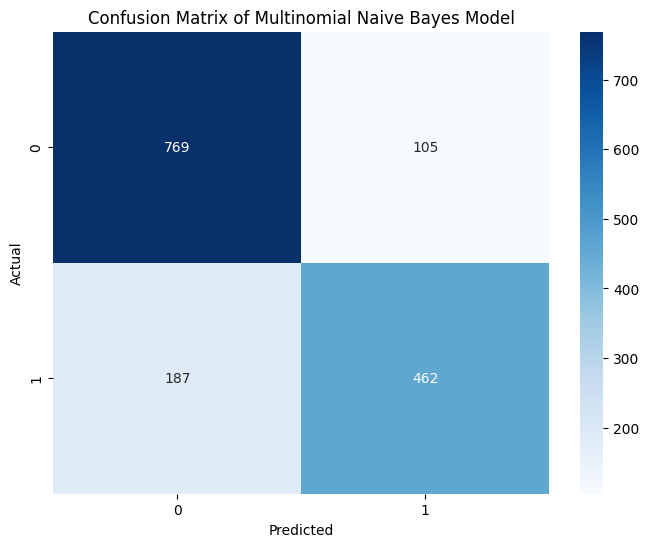

In [71]:
# Visualize the Confusion Matrix for Multinomial Naive Bayes model
cm = confusion_matrix(y_val, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix of Multinomial Naive Bayes Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

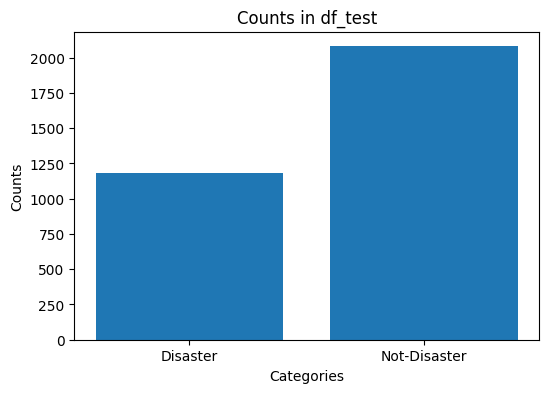

In [72]:
# Bar plot for Multinomial Naive Bayes model
labels = ['Disaster', 'Not-Disaster']
counts = [len(df_test[df_test['target'] == 1]), len(df_test[df_test['target'] == 0])]
plt.figure(figsize=(6, 4))
plt.bar(labels, counts)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Counts in df_test')
plt.show()

In [73]:
# Create an instance of the Logistic Regression model
model = LogisticRegression()

# Train the model using the training data
model.fit(X_train_vectorized, y_train)

# Make predictions on the validation dataset using the trained model
predictions = model.predict(X_val_vectorized)

# Calculate evaluation metrics using the actual target values from the validation dataset
accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
precision = precision_score(y_val, predictions)
recall = recall_score(y_val, predictions)

# Print the evaluation metrics
print("Logistic Regression model Accuracy:", accuracy)
print("Logistic Regression model F1 Score:", f1)
print("Logistic Regression model Precision:", precision)
print("Logistic Regression model Recall:", recall)

Logistic Regression model Accuracy: 0.8102429415627052
Logistic Regression model F1 Score: 0.7671232876712328
Logistic Regression model Precision: 0.8040540540540541
Logistic Regression model Recall: 0.7334360554699538


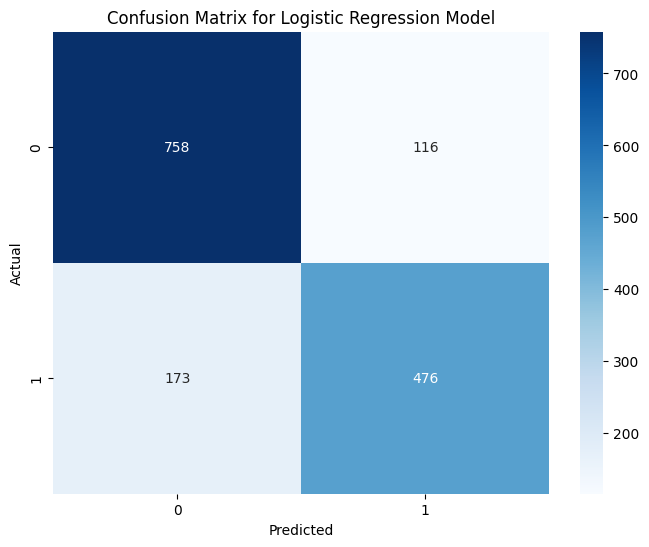

In [74]:
# Visualize the Confusion Matrix for Logistic Regression model
cm = confusion_matrix(y_val, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

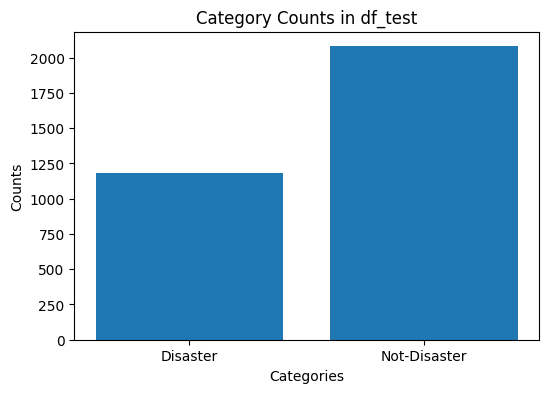

In [75]:
# Bar plot for Logistic Regression model
labels = ['Disaster', 'Not-Disaster']
counts = [len(df_test[df_test['target'] == 1]), len(df_test[df_test['target'] == 0])]
plt.figure(figsize=(6, 4))
plt.bar(labels, counts)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Category Counts in df_test')
plt.show()

In [76]:
# Final Output
df_test = df_test.drop('text', axis=1)
df_test.set_index('id', inplace=True)
df_test.to_csv('sample.csv')